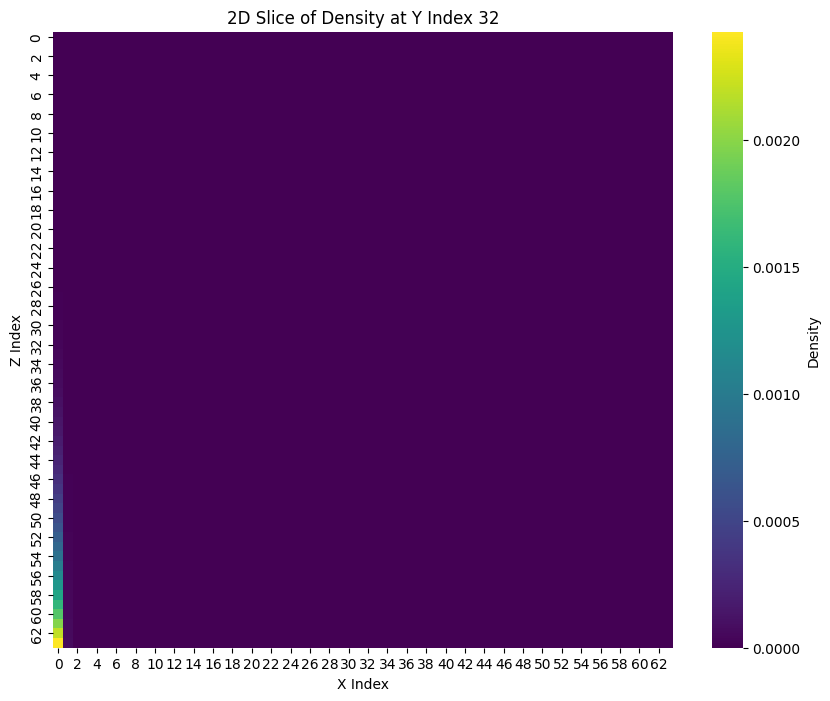

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'parameters/wind_density_output.csv'
wind_density_data = np.loadtxt(file_path, delimiter=',')
rho = wind_density_data.reshape(64, 64, 64)

y_index = 32
xz_slice = rho[:, y_index, :]

plt.figure(figsize=(10, 8))
sns.heatmap(xz_slice, cmap='viridis', cbar_kws={'label': 'Density'})
plt.title(f'2D Slice of Density at Y Index {y_index}')
plt.xlabel('X Index')
plt.ylabel('Z Index')
plt.show()
